<a href="https://colab.research.google.com/github/tdiego74/Clase_Data_Science_I_PBLC/blob/main/PF_Data_SC_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABSTRACT**

**Objetivo del Proyecto:**

El análisis de la calidad del vino tinto es esencial para entender cómo las propiedades fisicoquímicas del vino influyen en su percepción de calidad. El dataset contiene información sobre varios atributos químicos de muestras de vino tinto, así como una calificación de calidad asignada por expertos en una escala de 0 a 10. Este proyecto tiene como objetivo explorar las relaciones entre estas características y la calidad del vino, identificar patrones significativos y formular hipótesis que puedan ser útiles para productores y consumidores de vino.

**Dataset:** : winequality-red.csv

**Descripción de la temática de los datos:**

El dataset proporcionado es sobre la calidad del vino tinto, que típicamente incluye variables relacionadas con sus características fisicoquímicas y una variable objetivo que indica la calidad del vino.

**Descripción de las variables:**

**Acidez fija:** Componente principal de los ácidos en el vino que contribuye a su sabor y estabilidad.

**Acidez volátil:** Ácidos que contribuyen a un sabor avinagrado, influenciando negativamente la calidad si están en niveles altos.

**Ácido cítrico:** Contribuye a la frescura y a un sabor ácido en el vino.

**Azúcar residual:** Cantidad de azúcar que queda después de la fermentación, influenciando el dulzor del vino.

**Cloruros:** Contribuyen a la sensación de salinidad en el vino.

**Dióxido de azufre libre:** Previene el crecimiento microbiano y la oxidación.

**Dióxido de azufre total:** Suma del dióxido de azufre libre y el combinado, es crucial para la preservación del vino.

**Densidad:** Influencia el cuerpo del vino y está relacionado con el contenido de alcohol y azúcar.

**pH:** Medida de acidez/alcalinidad del vino, influye en la estabilidad y el sabor.

**Sulfatos:** Contribuyen a la conservación y ayudan a incrementar la intensidad del sabor.

**Alcohol:** Influencia el cuerpo, sabor y estabilidad del vino.

**Calidad:** Variable objetivo que mide la calidad del vino en una escala (generalmente de 0 a 10).

**Preguntas de Interes e Hipótesis:**

Se utilizarán diversas técnicas de visualización y análisis de datos para descubrir insights claves y responder preguntas específicas relacionadas con la influencia de diferentes variables en la calidad del vino.

1. ¿Existe una correlación significativa entre el contenido de alcohol, la acidez volátil y la calidad del vino?
    *   HIPOTESIS 1: Los vinos con mayor contenido de alcohol tienden a tener una mejor calificación de calidad.
2. ¿Cómo influye el contenido de sulfatos y la densidad en la calidad del vino?
    *   HIPOTESIS 2: La acidez volátil tiene una relación inversa con la calidad del vino, es decir, niveles más altos de acidez volátil se asocian con una menor calidad.
3. ¿Las variables como el pH, el ácido cítrico y el azúcar residual tienen un impacto en la calidad del vino?
    *   HIPOTESIS 3a: La calidad del vino está positivamente correlacionada con niveles moderados de sulfatos y pH.
    *   HIPOTESIS 3b: La calidad del vino está positivamente correlacionada con niveles moderados de sulfatos y pH.




In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Lectura del Dataset
url='https://raw.githubusercontent.com/tdiego74/Clase_Data_Science_I_PBLC/main/winequality-red.csv'
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Traduccion del nombre de las Columnas
df= df.rename(columns={"fixed acidity": "Acidez Fija", "volatile acidity": "Acidez Volatil", "citric acid": "Ácido cítrico",
                       "residual sugar": "Azúcar residual", "chlorides":"Cloruros", "free sulfur dioxide":"Dióxido de azufre libre",
                       "total sulfur dioxide":"Dióxido de azufre total", "density":"Densidad", "sulphates":"Sulfatos",
                       "alcohol":"Alcohol", "quality":"Calidad"})
df.head()

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Vista de las primras 15 filas del Dataset
df.head(15)

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.dtypes

Acidez Fija                float64
Acidez Volatil             float64
Ácido cítrico              float64
Azúcar residual            float64
Cloruros                   float64
Dióxido de azufre libre    float64
Dióxido de azufre total    float64
Densidad                   float64
pH                         float64
Sulfatos                   float64
Alcohol                    float64
Calidad                      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez Fija              1599 non-null   float64
 1   Acidez Volatil           1599 non-null   float64
 2   Ácido cítrico            1599 non-null   float64
 3   Azúcar residual          1599 non-null   float64
 4   Cloruros                 1599 non-null   float64
 5   Dióxido de azufre libre  1599 non-null   float64
 6   Dióxido de azufre total  1599 non-null   float64
 7   Densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   Sulfatos                 1599 non-null   float64
 10  Alcohol                  1599 non-null   float64
 11  Calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [9]:
mpl.style.use('seaborn')

<ipython-input-9-2f1545674514>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


## **Pregunta e Hipótesis 1**
####**Pregunta**: ¿Existe una correlación positiva entre el contenido de alcohol y la calidad del vino?
####**Hipótesis**: Los vinos con mayor contenido de alcohol tienden a tener una mejor calificación de calidad.

<ipython-input-46-27fca52dab18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Calidad', data=df, palette='viridis')


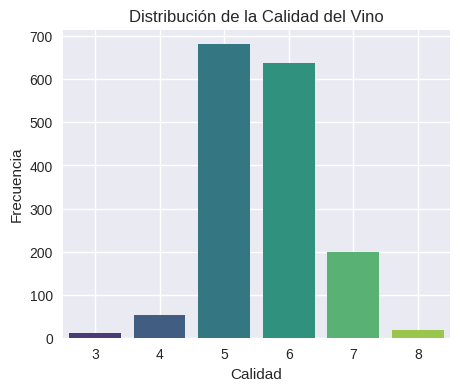

In [46]:
# Histograma de la Calidad del Vino (Univariado)
plt.figure(figsize=(5, 4))
sns.countplot(x='Calidad', data=df, palette='viridis')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

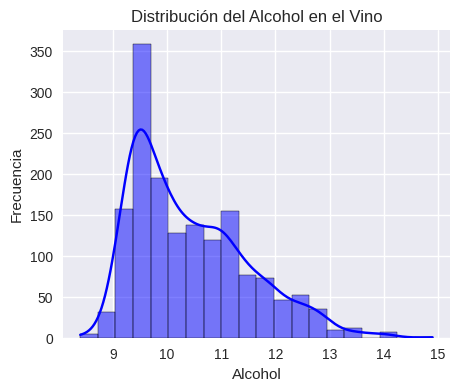

In [47]:
# Histograma del Alcohol (Univariado)
plt.figure(figsize=(5, 4))
sns.histplot(df['Alcohol'], bins=20, kde=True, color='blue')
plt.title('Distribución del Alcohol en el Vino')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

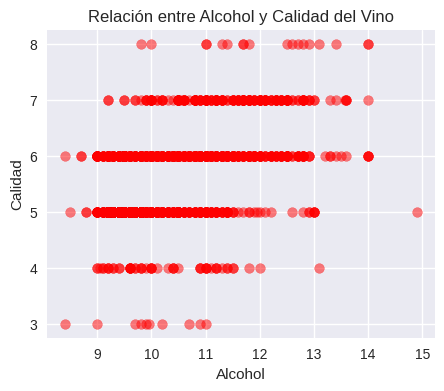

In [48]:
# Scatterplot: Relación entre Alcohol y Calidad del Vino (Bivariado)
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(df['Alcohol'], df['Calidad'], color='red', alpha=0.5)
ax.set_title('Relación entre Alcohol y Calidad del Vino')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Calidad')
plt.grid(True)
plt.show()

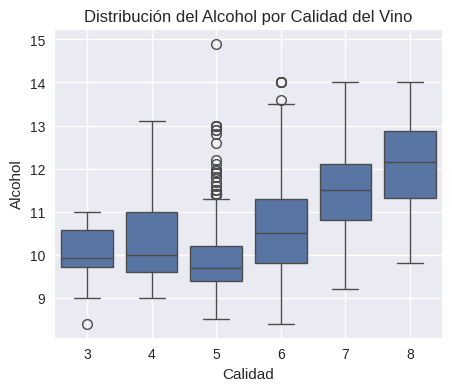

In [49]:
# Boxplot: Comparación de la Distribución del Alcohol entre Diferentes Calidades (Bivariado)
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='Calidad', y='Alcohol', data=df, ax=ax)
ax.set_title('Distribución del Alcohol por Calidad del Vino')
ax.set_xlabel('Calidad')
ax.set_ylabel('Alcohol')
plt.grid(True)
plt.show()


## **Interpretación:**
Los gráficos de dispersión y boxplot muestran que, en general, los vinos con mayor contenido de alcohol tienden a tener una mejor calidad.

Se observa una ligera tendencia positiva entre el contenido de alcohol y la calidad del vino.

## **Conclusión Hipotesis 1**
La hipótesis de que los vinos con mayor contenido de alcohol tienden a tener una mejor calificación de calidad es aceptada.

## **Pregunta e Hipótesis 2**
####**Pregunta**: ¿Existe una correlación negativa entre la acidez volátil y la calidad del vino?
####**Hipótesis**: La acidez volátil tiene una relación inversa con la calidad del vino, es decir, niveles más altos de acidez volátil se asocian con una menor calidad.

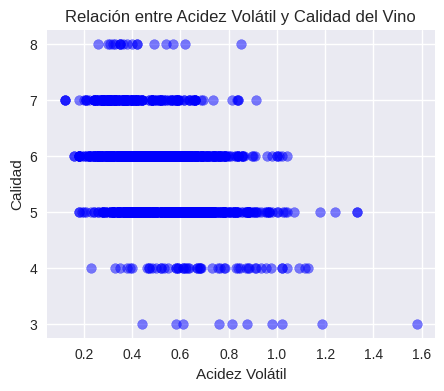

In [50]:
# Scatterplot: Relación entre Acidez Volátil y Calidad del Vino (Bivariado)
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(df['Acidez Volatil'], df['Calidad'], color='blue', alpha=0.5)
ax.set_title('Relación entre Acidez Volátil y Calidad del Vino')
ax.set_xlabel('Acidez Volátil')
ax.set_ylabel('Calidad')
plt.grid(True)
plt.show()

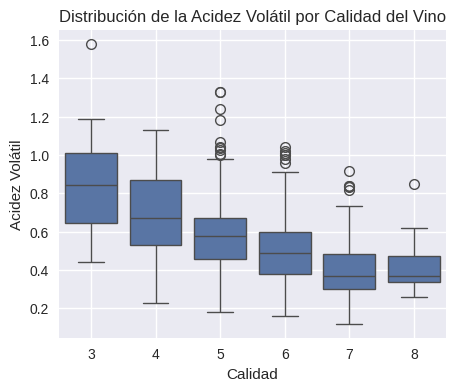

In [51]:
# Boxplot: Comparación de la Distribución de la Acidez Volátil entre Diferentes Calidades (Bivariado)
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='Calidad', y='Acidez Volatil', data=df, ax=ax)
ax.set_title('Distribución de la Acidez Volátil por Calidad del Vino')
ax.set_xlabel('Calidad')
ax.set_ylabel('Acidez Volátil')
plt.grid(True)
plt.show()

## **Interpretación:**
Los gráficos de dispersión y boxplot muestran que los vinos con mayor acidez volátil tienden a tener una menor calidad.

Se observa una tendencia negativa entre la acidez volátil y la calidad del vino.

## **Conclusión Hipotesis 2**
La hipótesis de que la acidez volátil tiene una relación inversa con la calidad del vino es aceptada.

## **Pregunta e Hipótesis 3**
####**Pregunta**: ¿Existe una correlación positiva entre los niveles de sulfatos y pH y la calidad del vino?
####**Hipótesis 3a**: La calidad del vino está positivamente correlacionada con niveles moderados de sulfatos.
####**Hipótesis 3b**: La calidad del vino está positivamente correlacionada con niveles moderados de pH.

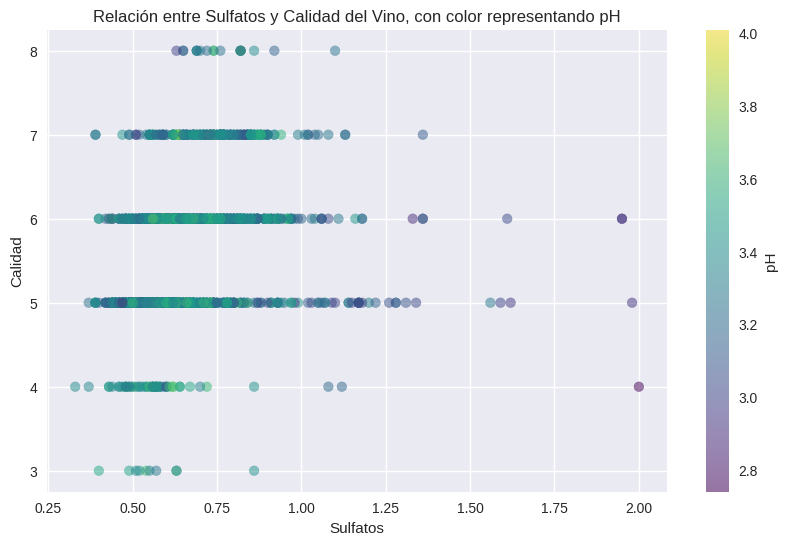

In [53]:
# Scatterplot: Relación entre Sulfatos y Calidad del Vino, con color representando pH (Multivariado)
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['Sulfatos'], df['Calidad'], c=df['pH'], cmap='viridis', alpha=0.5)
ax.set_title('Relación entre Sulfatos y Calidad del Vino, con color representando pH')
ax.set_xlabel('Sulfatos')
ax.set_ylabel('Calidad')
plt.colorbar(scatter, label='pH')
plt.grid(True)
plt.show()

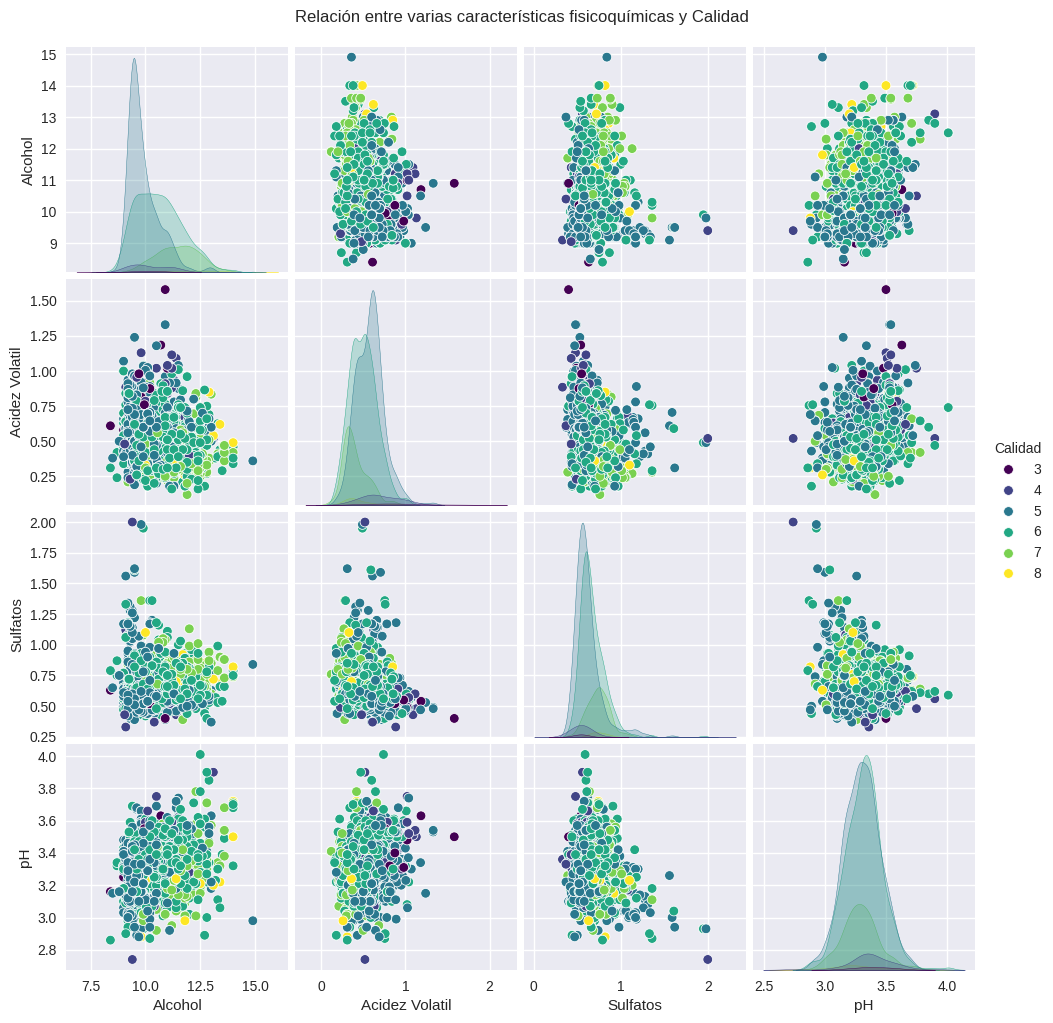

In [54]:
# Pairplot: Relación entre varias características fisicoquímicas y Calidad (Multivariado)
sns.pairplot(df, vars=['Alcohol', 'Acidez Volatil', 'Sulfatos', 'pH'], hue='Calidad', palette='viridis', diag_kind='kde')
plt.suptitle('Relación entre varias características fisicoquímicas y Calidad', y=1.02)
plt.show()

## **Interpretación:**
Los gráficos muestran que los niveles de sulfatos y pH están relacionados con la calidad del vino.

Los vinos con niveles moderados de sulfatos y pH tienden a tener una mejor calidad.

## **Conclusión Hipotesis 2**
La hipótesis de que la calidad del vino está positivamente correlacionada con niveles moderados de sulfatos y pH es aceptada.

## **Identificación de Valores Perdidos**

In [55]:
# Identificar valores perdidos
missing_values = df.isnull().sum()
print("Valores perdidos en cada columna:")
print(missing_values)

# Interpretación
# No hay valores perdidos en el dataset, por lo que no es necesario realizar un tratamiento adicional.


Valores perdidos en cada columna:
Acidez Fija                0
Acidez Volatil             0
Ácido cítrico              0
Azúcar residual            0
Cloruros                   0
Dióxido de azufre libre    0
Dióxido de azufre total    0
Densidad                   0
pH                         0
Sulfatos                   0
Alcohol                    0
Calidad                    0
dtype: int64


No hay valores perdidos en el dataset, por lo que no es necesario realizar un tratamiento adicional.